In [1]:
import lsst.sims.skybrightness as sb
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
# Load the sky model
sm = sb.SkyModel(mags=True)

In [3]:
# Define MJDs to calc sky at
mjds = np.arange(5700,5701,.1/24)
# Set up arrays to hold the results
filterNames = ['u','g','r','i','z','y']
mags = np.zeros(mjds.size,dtype=zip(filterNames,[float]*6))
coords = np.zeros(mjds.size, dtype=zip(['ra','dec'],[float]*2))
moonAlt = np.zeros(mjds.size, dtype=float)
sunAlt = np.zeros(mjds.size, dtype=float)

In [4]:
# Loop over the mjds and calculate the sky brighness at zenith
for i,mjd in enumerate(mjds):
    sm.setRaDecMjd(0.,90.,mjd, degrees=True, azAlt=True)
    mags[i] = sm.returnMags()
    coords['ra'][i] += sm.ra
    coords['dec'][i] += sm.dec
    moonAlt[i] += sm.moonAlt
    sunAlt[i] += sm.sunAlt

/Users/yoachim/gitRepos/sims_utils/python/lsst/sims/utils/coordinateTransformations.py:492: RuntimeWarning: invalid value encountered in arccos
  haRad0 =  numpy.arccos(costheta)
/Users/yoachim/lsst/DarwinX86/healpy/1.8.1+11/lib/python/healpy-1.8.1-py2.7-macosx-10.5-x86_64.egg/healpy/pixelfunc.py:1045: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if phi == None:


In [5]:
# Check what moon phase it was run at (0=new moon, 100=full moon)
sm.moonPhase

91.88821411132812

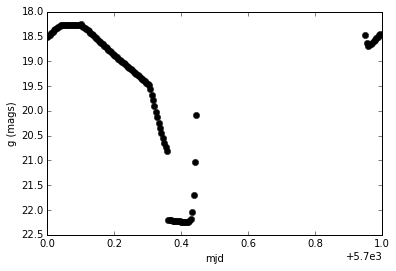

In [6]:
# Note, things can get zany if the sun is up
sunDown = np.where(sunAlt < np.radians(-12.))
filterName = 'g'
plt.plot(mjds[sunDown], mags[filterName][sunDown], 'ko')
plt.gca().invert_yaxis()
plt.xlabel('mjd')
plt.ylabel(filterName+' (mags)')